# The Brinson-Fachler Model #

In [1]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt

# Statistics
import statsmodels.api as sm
from scipy.stats import norm

# Handle Files
import sys
import os

# Import Local Functions
sys.path.append(os.path.abspath("../source"))
from functions import import_daily_financial_data
from portfolios_toolkit import markowitz_weights

### Building a Portfolio ###

In [2]:
# Import the Returns Data
returns_df = pd.read_csv(r'..\additional_data\stocks_returns.csv')
returns_df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
returns_df.set_index('Date', inplace=True)
returns_df.index = pd.to_datetime(returns_df.index)

returns_df

,A,AAPL,ABBV,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WST,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.018915,-0.028576,-0.018998,0.000222,-0.004989,-0.018352,-0.035215,-0.000721,-0.014722,-0.010052,...,-0.013900,0.000000,-0.017166,-0.011416,-0.027743,-0.064259,-0.020527,0.036625,-0.014177,-0.006022
2015-01-06,-0.015700,0.000094,-0.004962,-0.011421,-0.020350,-0.023753,-0.019911,-0.008324,-0.019973,-0.011709,...,-0.017255,-0.001108,-0.021562,0.005306,-0.005330,-0.005898,-0.012351,-0.008513,-0.007231,-0.009804
2015-01-07,0.013184,0.013925,0.039621,0.008076,0.008190,0.010462,0.014920,0.008685,-0.002089,0.007747,...,0.016088,0.003045,0.028945,0.008598,0.010081,0.007857,0.032601,0.024566,0.025146,0.020432
2015-01-08,0.029534,0.037702,0.010404,0.020345,0.025135,0.017501,-0.014717,0.022681,0.024446,0.003522,...,0.019467,0.010722,0.011959,0.011532,0.016508,0.007517,0.017270,0.010561,0.021134,0.015282
2015-01-09,-0.007364,0.001072,-0.027736,-0.010563,-0.014922,-0.000731,-0.008566,-0.007188,-0.009054,-0.011270,...,-0.011519,-0.001368,0.012422,-0.012361,-0.001411,-0.019043,-0.001768,-0.014529,0.014508,0.001583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.011083,0.011413,0.008985,0.003929,0.002683,0.014782,0.004355,0.007822,0.012494,0.013291,...,0.009663,0.006390,0.007575,0.007210,0.000940,0.005432,0.008480,0.004484,0.012187,0.002553
2024-12-26,-0.001986,0.003171,-0.004454,0.004434,0.004944,-0.000138,-0.000395,0.002594,-0.003159,-0.002203,...,0.001981,-0.003190,0.005952,-0.000440,0.000845,0.002705,0.007380,-0.000466,0.003559,0.004966
2024-12-27,-0.002137,-0.013331,-0.006663,-0.002432,-0.008208,-0.004919,-0.000593,-0.003539,-0.008999,-0.006305,...,-0.000630,-0.006410,-0.007079,-0.000587,-0.000094,-0.007966,-0.005678,-0.003549,-0.019799,-0.005574


In [3]:
# Make the portfolio DataFrame
portfolio_holdings_df = returns_df[['AAPL', 'AMZN', 'META', 'MSFT', 'NVDA']]
portfolio_holdings_df = portfolio_holdings_df

portfolio_holdings_df

,AAPL,AMZN,META,MSFT,NVDA
Date,,,,,
2015-01-05,-0.028576,-0.020731,-0.016191,-0.009238,-0.017035
2015-01-06,0.000094,-0.023098,-0.013565,-0.014786,-0.030788
2015-01-07,0.013925,0.010544,0.000000,0.012625,-0.002609
2015-01-08,0.037702,0.006813,0.026309,0.028994,0.036927
2015-01-09,0.001072,-0.011818,-0.005644,-0.008441,0.004020
...,...,...,...,...,...
2024-12-24,0.011413,0.017573,0.013084,0.009330,0.003930
2024-12-26,0.003171,-0.008770,-0.007266,-0.002781,-0.002070
2024-12-27,-0.013331,-0.014641,-0.005884,-0.017453,-0.021088


In [4]:
# Portfolio's Expected Returns
expected_returns = portfolio_holdings_df.mean()

expected_returns

AAPL    0.000927
AMZN    0.001056
META    0.000801
MSFT    0.000935
NVDA    0.002238
dtype: float64

In [5]:
# Covariance Matrix
covariance_matrix = portfolio_holdings_df.cov()

covariance_matrix

,AAPL,AMZN,META,MSFT,NVDA
AAPL,0.000322,0.000205,0.000224,0.000210,0.000298
AMZN,0.000205,0.000423,0.000290,0.000232,0.000324
META,0.000224,0.000290,0.000569,0.000237,0.000349
MSFT,0.000210,0.000232,0.000237,0.000292,0.000316
NVDA,0.000298,0.000324,0.000349,0.000316,0.000923


In [6]:
# Obtain Weights
p_weights = markowitz_weights(
    expected_returns, 
    covariance_matrix,
    0.0015
)

In [7]:
# Create a Portfolio Weights DF
portfolio_weights = pd.Series(
    p_weights,
    index = portfolio_holdings_df.columns,
    name = 'weights'
)

portfolio_weights

AAPL    0.265401
AMZN    0.237189
META   -0.138590
MSFT    0.236767
NVDA    0.399233
Name: weights, dtype: float64

In [8]:
# Portfolio Returns
portfolio_returns = portfolio_holdings_df @ p_weights
portfolio_returns.name = 'portfolio_returns'

portfolio_returns

Date
2015-01-05   -0.019245
2015-01-06   -0.019366
2015-01-07    0.008144
2015-01-08    0.029583
2015-01-09   -0.002130
                ...   
2024-12-24    0.009162
2024-12-26   -0.001717
2024-12-27   -0.018747
2024-12-30   -0.005920
2024-12-31   -0.013851
Name: portfolio_returns, Length: 2515, dtype: float64

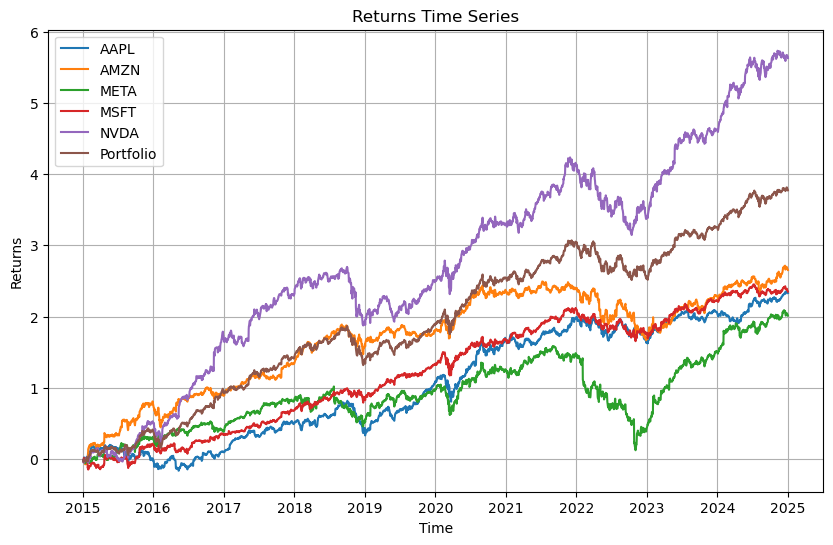

In [9]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(portfolio_holdings_df.cumsum(), label=portfolio_holdings_df.columns, alpha=1)
plt.plot(portfolio_returns.cumsum(), label='Portfolio', alpha=1)

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show() 

### Obtaining a Benchmark: Using a Hypothetical Portfolio ###

In [10]:
# Get the returns of each stock of our portfolio but in the IWY
iwy_weights = pd.Series(
    [9.65, 6.66, 4.34, 11.28, 10.47],
    index = portfolio_holdings_df.columns,
    name = 'weights'
)

iwy_weights = iwy_weights/100

# Normalized
norm_iwy_weights = iwy_weights/iwy_weights.sum()

norm_iwy_weights

AAPL    0.227594
AMZN    0.157075
META    0.102358
MSFT    0.266038
NVDA    0.246934
Name: weights, dtype: float64

In [11]:
# Build the Benchmark Returns
benchmark_returns = portfolio_holdings_df @ norm_iwy_weights
benchmark_returns.name = 'benchmark_returns'

benchmark_returns

Date
2015-01-05   -0.018082
2015-01-06   -0.016531
2015-01-07    0.007540
2015-01-08    0.029176
2015-01-09   -0.003443
                ...   
2024-12-24    0.010150
2024-12-26   -0.002651
2024-12-27   -0.015787
2024-12-30   -0.008923
2024-12-31   -0.011879
Name: benchmark_returns, Length: 2515, dtype: float64

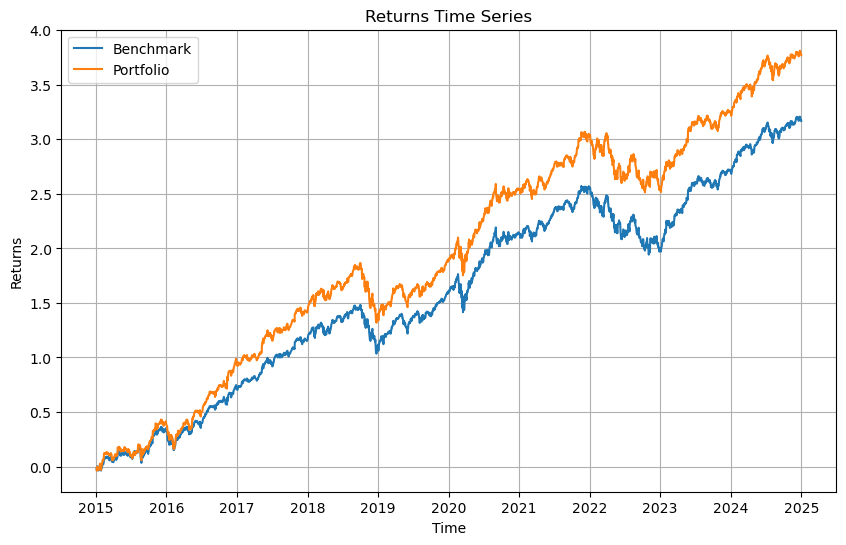

In [12]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(benchmark_returns.cumsum(), label='Benchmark', alpha=1)
plt.plot(portfolio_returns.cumsum(), label='Portfolio', alpha=1)

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show() 

In [13]:
# Calculate the Mean Returns
portfolio_total_returns = portfolio_returns.cumsum().iloc[-1]
benchmark_total_returns = benchmark_returns.cumsum().iloc[-1]

print(portfolio_total_returns)
print(benchmark_total_returns)

3.7725000000000004
3.168693528843234


In [14]:
# Calculate the Excess Returns
excess_returns = portfolio_total_returns - benchmark_total_returns

excess_returns

0.6038064711567666

In [27]:
# Calculate the Brinson-Fachler Allocation Effect
allocation_effect = (portfolio_weights - norm_iwy_weights) * (portfolio_holdings_df.cumsum().iloc[-1] - benchmark_total_returns)
allocation_effect.name = 'allocation_effect'

allocation_effect

AAPL   -0.031681
AMZN   -0.041170
META    0.278261
MSFT    0.023931
NVDA    0.374465
Name: allocation_effect, dtype: float64

In [28]:
# Calculate the Brinson-Fachler Selection Effect
selection_effect = norm_iwy_weights * (portfolio_holdings_df.cumsum().iloc[-1] - portfolio_holdings_df.cumsum().iloc[-1])
selection_effect.name = 'selection_effect'

selection_effect

AAPL    0.0
AMZN    0.0
META    0.0
MSFT    0.0
NVDA    0.0
Name: selection_effect, dtype: float64

In [29]:
# Calculate the Brinson-Fachler Intersection Effect
interaction_effect = (portfolio_weights - norm_iwy_weights) * (portfolio_holdings_df.cumsum().iloc[-1] - portfolio_holdings_df.cumsum().iloc[-1])
interaction_effect.name = 'interaction_effect'

interaction_effect

AAPL    0.0
AMZN    0.0
META   -0.0
MSFT   -0.0
NVDA    0.0
Name: interaction_effect, dtype: float64

In [30]:
# Calculate the Total Effect
bf_total_attribution = (
        allocation_effect + 
        selection_effect +
        interaction_effect
)

bf_total_attribution.name = 'bf_total_attribution'

bf_total_attribution

AAPL   -0.031681
AMZN   -0.041170
META    0.278261
MSFT    0.023931
NVDA    0.374465
Name: bf_total_attribution, dtype: float64

In [31]:
# Show
brinson_fachler_df = pd.DataFrame({
    'allocation': allocation_effect,
    'selection': selection_effect,
    'interaction': interaction_effect,
    'total': bf_total_attribution
})

brinson_fachler_df

,allocation,selection,interaction,total
AAPL,-0.031681,0.0,0.0,-0.031681
AMZN,-0.041170,0.0,0.0,-0.041170
META,0.278261,0.0,-0.0,0.278261
MSFT,0.023931,0.0,-0.0,0.023931
NVDA,0.374465,0.0,0.0,0.374465


In [32]:
brinson_fachler_df.sum().round(6)

allocation     0.603806
selection      0.000000
interaction    0.000000
total          0.603806
dtype: float64

In [33]:
# Divide the DataFrame by the Excess Return
norm_brinson_fachler_df = (brinson_fachler_df/brinson_fachler_df['total'].sum()) * 100

norm_brinson_fachler_df

,allocation,selection,interaction,total
AAPL,-5.246887,0.0,0.0,-5.246887
AMZN,-6.818404,0.0,0.0,-6.818404
META,46.084507,0.0,-0.0,46.084507
MSFT,3.963326,0.0,-0.0,3.963326
NVDA,62.017458,0.0,0.0,62.017458


In [34]:
norm_brinson_fachler_df.sum().round(2)

allocation     100.0
selection        0.0
interaction      0.0
total          100.0
dtype: float64

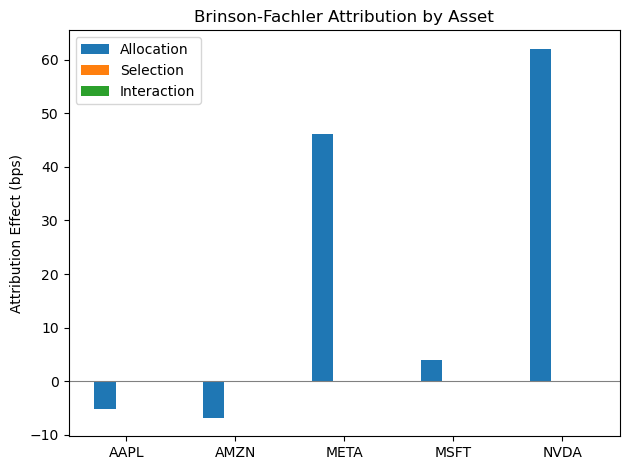

In [35]:
# Plotting individual attribution effects per asset
fig, ax = plt.subplots()

bar_width = 0.2
x = np.arange(len(norm_brinson_fachler_df))

# Plot each component
ax.bar(x - bar_width, norm_brinson_fachler_df["allocation"], width=bar_width, label="Allocation")
ax.bar(x, norm_brinson_fachler_df["selection"], width=bar_width, label="Selection")
ax.bar(x + bar_width, norm_brinson_fachler_df["interaction"], width=bar_width, label="Interaction")

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(norm_brinson_fachler_df.index)
ax.set_ylabel("Attribution Effect (bps)")
ax.set_title("Brinson-Fachler Attribution by Asset")
ax.legend()
ax.axhline(0, color="gray", linewidth=0.8)

plt.tight_layout()
plt.show()

Since both portfolios (ours and the benchmark) contain the same stocks but with different weights, the allocation effect will explain 100% of the extraordinary returns, while the selection and interaction effects will be 0%.

### Sector Example ###

First create a portfolio with 3 sectors:

In [79]:
portfolio_stocks = [
    "META",         # Communication
    "GOOG",         # Communication
    "NFLX",         # Communication,
    "AMZN",         # Consumer Discretionary
    "TSLA",         # Consumer Discretionary
    "HD",           # Consumer Discretionary
    "MSFT",         # Information Technology
    "NVDA",         # Information Technology	
    "AAPL",         # Information Technology	
]

In [103]:
holdings_returns = returns_df.loc['2020':][portfolio_stocks]

holdings_returns

,META,GOOG,NFLX,AMZN,TSLA,HD,MSFT,NVDA,AAPL
Date,,,,,,,,,
2020-01-02,0.021831,0.022446,0.019101,0.026789,0.028119,0.005844,0.018347,0.019402,0.022560
2020-01-03,-0.005305,-0.004919,-0.011926,-0.012213,0.029203,-0.003329,-0.012530,-0.016135,-0.009770
2020-01-06,0.018658,0.024358,0.030014,0.014776,0.019072,0.004694,0.002582,0.004185,0.007937
2020-01-07,0.002161,-0.000624,-0.015242,0.002089,0.038067,-0.006568,-0.009159,0.012034,-0.004714
2020-01-08,0.010087,0.007850,0.025404,-0.007839,0.048033,0.014854,0.015803,0.001874,0.015958
...,...,...,...,...,...,...,...,...,...
2024-12-24,0.013084,0.008029,0.022425,0.017573,0.070991,0.009359,0.009330,0.003930,0.011413
2024-12-26,-0.007266,-0.002382,-0.008598,-0.008770,-0.017787,-0.002528,-0.002781,-0.002070,0.003171
2024-12-27,-0.005884,-0.015647,-0.018115,-0.014641,-0.050745,-0.005787,-0.017453,-0.021088,-0.013331


In [104]:
holdings_total_returns = holdings_returns.cumsum().iloc[-1]
holdings_total_returns.name = 'total_returns'

holdings_total_returns

META    1.052067
GOOG    1.050458
NFLX    1.013288
AMZN    0.864811
TSLA    2.672798
HD      0.697804
MSFT    1.027615
NVDA    3.132203
AAPL    1.258038
Name: total_returns, dtype: float64

In [105]:
# Components
holdings_mean_returns = holdings_returns.mean()
holdings_covariance_matrix = holdings_returns.cov()

# Obtain Weights
p_weights = markowitz_weights(
    holdings_mean_returns, 
    holdings_covariance_matrix,
    0.0012
)

p_weights

array([-0.10159582,  0.23200702,  0.03745044, -0.02890295,  0.04827094,
        0.30021879,  0.00299201,  0.20125612,  0.30830345])

In [106]:
# Create a Portfolio Weights DF
portfolio_weights = pd.Series(
    p_weights,
    index = holdings_returns.columns,
    name = 'weights'
)

portfolio_weights

META   -0.101596
GOOG    0.232007
NFLX    0.037450
AMZN   -0.028903
TSLA    0.048271
HD      0.300219
MSFT    0.002992
NVDA    0.201256
AAPL    0.308303
Name: weights, dtype: float64

In [107]:
# Map stocks
stock_to_sector = {
    "META": "Communication",
    "GOOG": "Communication",
    "NFLX": "Communication",
    "AMZN": "Consumer Discretionary",
    "TSLA": "Consumer Discretionary",
    "HD": "Consumer Discretionary",
    "MSFT": "Information Technology",
    "NVDA": "Information Technology",
    "AAPL": "Information Technology"
}

In [108]:
# Create a DF

df_temp = pd.DataFrame({
    'Sector': pd.Series(stock_to_sector),
    'Weight': portfolio_weights,
    'Return': holdings_total_returns
})

df_temp

,Sector,Weight,Return
META,Communication,-0.101596,1.052067
GOOG,Communication,0.232007,1.050458
NFLX,Communication,0.037450,1.013288
AMZN,Consumer Discretionary,-0.028903,0.864811
TSLA,Consumer Discretionary,0.048271,2.672798
HD,Consumer Discretionary,0.300219,0.697804
MSFT,Information Technology,0.002992,1.027615
NVDA,Information Technology,0.201256,3.132203
AAPL,Information Technology,0.308303,1.258038


In [109]:
# Calculate weight for each sector:

sector_weights = df_temp.groupby('Sector')['Weight'].sum()

sector_weights

Sector
Communication             0.167862
Consumer Discretionary    0.319587
Information Technology    0.512552
Name: Weight, dtype: float64

In [110]:
# Calculate returns for each sector
def weighted_return(group):
    return (group['Weight'] * group['Return']).sum() / group['Weight'].sum()

In [111]:
sector_returns = df_temp.groupby('Sector').apply(weighted_return)
sector_returns.name = 'sector_returns'

sector_returns

Sector
Communication             1.041191
Consumer Discretionary    0.981007
Information Technology    1.992594
Name: sector_returns, dtype: float64

In [112]:
benchmark_weights = pd.Series(
    [0.0967, 0.1034, 0.3209],
    index = sector_weights.index,
    name = 'benchmark_weights'
)

benchmark_weights

Sector
Communication             0.0967
Consumer Discretionary    0.1034
Information Technology    0.3209
Name: benchmark_weights, dtype: float64

In [114]:
# Import ETF data to approximate sector returns
tickers = [
    'XLC',          # Communication ETF
    'XLY',          # Consumer Discretionary ETF
    'XLK'           # Information Technology ETF
]      

# DataFrame to store everything
etfs_returns = pd.DataFrame()

for ticker in tickers:
    df_stock = import_daily_financial_data(
        ticker=ticker, 
        start_date='2020-01-01', 
        end_date='2025-01-01', 
        returns=True
    )
    
    returns = df_stock['returns'].rename(ticker)
    
    etfs_returns = pd.concat([etfs_returns, returns], axis=1)
    
    print(f'Data Ready for {ticker}')

[*********************100%***********************]  1 of 1 completed


Data Ready for XLC


[*********************100%***********************]  1 of 1 completed


Data Ready for XLY


[*********************100%***********************]  1 of 1 completed

Data Ready for XLK


In [120]:
# Total Returns
etfs_total_returns = etfs_returns.cumsum().iloc[-1]
etfs_total_returns.name = 'etfs_total_returns'
etfs_total_returns.index = benchmark_weights.index

etfs_total_returns

Sector
Communication             0.624624
Consumer Discretionary    0.612511
Information Technology    0.957523
Name: etfs_total_returns, dtype: float64

In [134]:
# Create a DataFrame to see all the data
bf_data = pd.DataFrame(
    index=benchmark_weights.index,
)

bf_data

""
Sector
Communication
Consumer Discretionary
Information Technology


In [135]:
# Add columns
bf_data['portfolio_weights'] = sector_weights
bf_data['portfolio_returns'] = sector_returns
bf_data['benchmark_weights'] = benchmark_weights
bf_data['benchmark_returns'] = etfs_total_returns

bf_data

,portfolio_weights,portfolio_returns,benchmark_weights,benchmark_returns
Sector,,,,
Communication,0.167862,1.041191,0.0967,0.624624
Consumer Discretionary,0.319587,0.981007,0.1034,0.612511
Information Technology,0.512552,1.992594,0.3209,0.957523


In [136]:
# and of course we need the benchmark

sp500_returns = import_daily_financial_data(
        ticker='^GSPC', 
        start_date='2020-01-01', 
        end_date='2025-01-01', 
        returns=True
    )

sp500_returns = sp500_returns['returns']

[*********************100%***********************]  1 of 1 completed


In [137]:
# And the benchmark returns
benchmark_total_returns = sp500_returns.cumsum().iloc[-1]

benchmark_total_returns

0.5907664158747497

Now we can calculate the effects

In [141]:
# Weights difference
bf_data['weights_diff'] = bf_data['portfolio_weights'] - bf_data['benchmark_weights']
bf_data['returns_diff'] = bf_data['portfolio_returns'] - bf_data['benchmark_returns']

bf_data

,portfolio_weights,portfolio_returns,benchmark_weights,benchmark_returns,weights_diff,returns_diff
Sector,,,,,,
Communication,0.167862,1.041191,0.0967,0.624624,0.071162,0.416566
Consumer Discretionary,0.319587,0.981007,0.1034,0.612511,0.216187,0.368496
Information Technology,0.512552,1.992594,0.3209,0.957523,0.191652,1.035071


In [139]:
# Calculate the Brinson-Fachler Allocation Effect
allocation_effect = bf_data['weights_diff'] * (bf_data['benchmark_returns'] - benchmark_total_returns)
allocation_effect.name = 'allocation_effect'

allocation_effect

Sector
Communication             0.002409
Consumer Discretionary    0.004701
Information Technology    0.070289
Name: allocation_effect, dtype: float64

In [142]:
# Calculate the Brinson-Fachler Allocation Effect
selection_effect = bf_data['benchmark_weights'] * bf_data['returns_diff']
selection_effect.name = 'selection_effect'

selection_effect

Sector
Communication             0.040282
Consumer Discretionary    0.038102
Information Technology    0.332154
Name: selection_effect, dtype: float64

In [143]:
# Calculate the Brinson-Fachler Intersection Effect
interaction_effect = bf_data['weights_diff'] * bf_data['returns_diff']
interaction_effect.name = 'interaction_effect'

interaction_effect

Sector
Communication             0.029644
Consumer Discretionary    0.079664
Information Technology    0.198373
Name: interaction_effect, dtype: float64

In [144]:
# Calculate the Total Effect
bf_total_attribution = (
        allocation_effect + 
        selection_effect +
        interaction_effect
)

bf_total_attribution.name = 'bf_total_attribution'

bf_total_attribution

Sector
Communication             0.072335
Consumer Discretionary    0.122467
Information Technology    0.600817
Name: bf_total_attribution, dtype: float64

In [145]:
# Show
brinson_fachler_df = pd.DataFrame({
    'allocation': allocation_effect,
    'selection': selection_effect,
    'interaction': interaction_effect,
    'total': bf_total_attribution
})

brinson_fachler_df

,allocation,selection,interaction,total
Sector,,,,
Communication,0.002409,0.040282,0.029644,0.072335
Consumer Discretionary,0.004701,0.038102,0.079664,0.122467
Information Technology,0.070289,0.332154,0.198373,0.600817


In [146]:
# Divide the DataFrame by the Excess Return
norm_brinson_fachler_df = (brinson_fachler_df/brinson_fachler_df['total'].sum()) * 100

norm_brinson_fachler_df

,allocation,selection,interaction,total
Sector,,,,
Communication,0.302831,5.062972,3.725846,9.091649
Consumer Discretionary,0.590843,4.789032,10.012819,15.392695
Information Technology,8.834559,41.747923,24.933174,75.515656


In [149]:
norm_brinson_fachler_df.sum().round(3)

allocation       9.728
selection       51.600
interaction     38.672
total          100.000
dtype: float64